<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/Arima%20Examples%20prepare%20data%20as%20TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#prepare data as TS
library(readr)
retail_data= read_csv("https://raw.githubusercontent.com/waelrash1/time_series_forecasting_dt302-2/main/supermarket_sales.csv")

Rows: 1000 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Invoice ID, Branch, City, Customer type, Gender, Product line, Dat...
dbl  (8): Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage...
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [34]:
#set.seed(1)
colnames(retail_data)[4] = "Customer_type"
head(retail_data)



Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1


In [35]:
colnames(retail_data)

[1] "Invoice ID"              "Branch"                 
 [3] "City"                    "Customer_type"          
 [5] "Gender"                  "Product line"           
 [7] "Unit price"              "Quantity"               
 [9] "Tax 5%"                  "Total"                  
[11] "Date"                    "Time"                   
[13] "Payment"                 "cogs"                   
[15] "gross margin percentage" "gross income"           
[17] "Rating"

In [9]:
#load necessary library
library(tidyverse) #for data manipulation and visualization
library(lubridate) #for datetime data
library(stringr) #for string data
library(forecast) #for time series prediction
#Install packages 
# install.packages("forecast")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [37]:


 #check for any missing values
sapply(retail_data, function(x) sum(is.na(x)))
#creating new column to calculate total sales
retail_data$sales = retail_data$Quantity * retail_data$`Unit price`

Invoice ID                  Branch                    City 
                      0                       0                       0 
          Customer_type                  Gender            Product line 
                      0                       0                       0 
             Unit price                Quantity                  Tax 5% 
                      0                       0                       0 
                  Total                    Date                    Time 
                      0                       0                       0 
                Payment                    cogs gross margin percentage 
                      0                       0                       0 
           gross income                  Rating 
                      0                       0

For Our Time Series Model, I am going to take only Date, Sales, and Customer.type columns for creating the model. Then formatting It to meet our needs for the analysis.

In [38]:
#select required cols for analysis and prediction
data_sales_normal<- retail_data %>%
    select("Date","Customer_type","sales") %>%
    filter(retail_data$Customer_type == "Normal") %>%
    group_by(Date,Customer_type) %>%
    summarise(Total_Sales = sum(sales))
#adding new column for %Y-%m
head(data_sales_normal)

`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


Date,Customer_type,Total_Sales
<chr>,<chr>,<dbl>
1/1/2019,Normal,1896.72
1/10/2019,Normal,1866.36
1/11/2019,Normal,962.22
1/12/2019,Normal,2711.69
1/13/2019,Normal,1021.10
1/14/2019,Normal,2076.54


In [ ]:
#adding new column for %Y-%m
data_sales_normal$Month <- mdy(data_sales_normal$Date) %>% format(format="%Y-%m-%d")
    head(data_sales_normal)
#tidying up our data frame
data_sales_normal <- subset(data_sales_normal, select = -c(Date))
   head(data_sales_normall
data_sales_normal <- data_sales_normal[,c("Month","Total_Sales")]

   head(data_sales_normall
data_sales_normal$Month <- as.Date(data_sales_normal$Month)
   head(data_sales_normal 


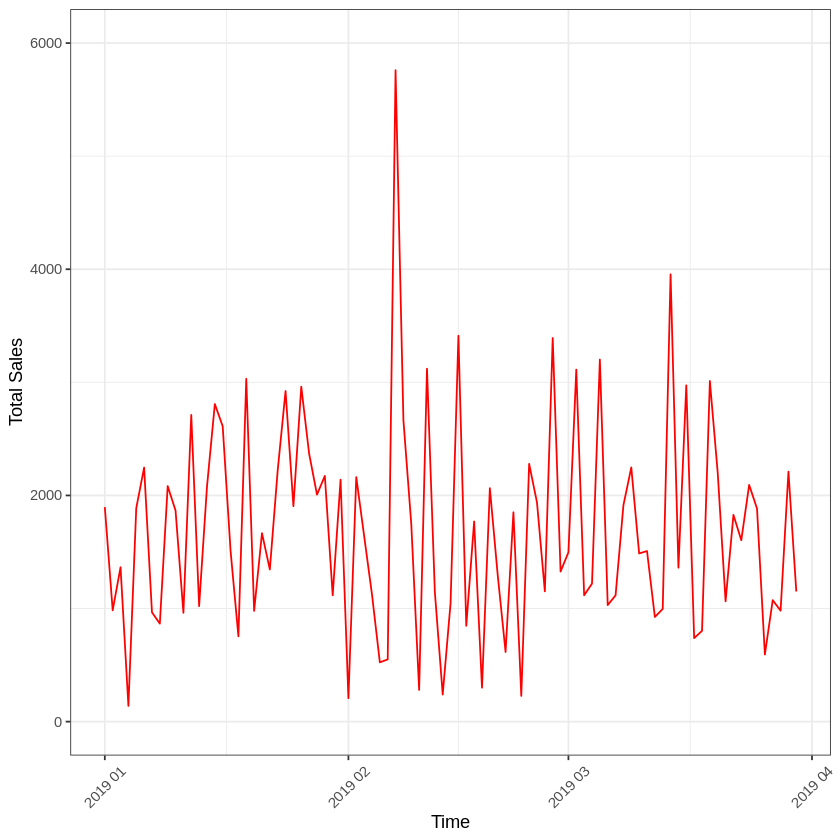

In [40]:
#Analyze and Visualize our data
library(ggplot2)
ggplot(data_sales_normal, aes(x=Month,y=Total_Sales)) + 
geom_line(col = 'red') +
ylim(0,6000) + xlab("Time") + ylab("Total Sales") +
scale_x_date(date_labels = "%Y %m", date_breaks = "1 month") +
theme_bw() + theme(legend.title = element_blank(),
                   axis.text.x = element_text(angle = 45, vjust = 0.5))


The Total Sales from January until April was showing fluctuations on a Monthly basis and honestly, the model might be inaccurate to predict our future sales for this dataset.
Moving on, let’s check the ACF and PACF of the data. Below, I have defined what ACF and PACF is so that you have a better understanding of the terms.
ACF ( Autocorrelation Function ) : Correlation between the Series values that are k apart ( k = lag order ).
PACF ( Partial Autocorrelation Function ) : Showing Partial Correlation between the Series values that are k apart ( accounting for the values of the interval between ).

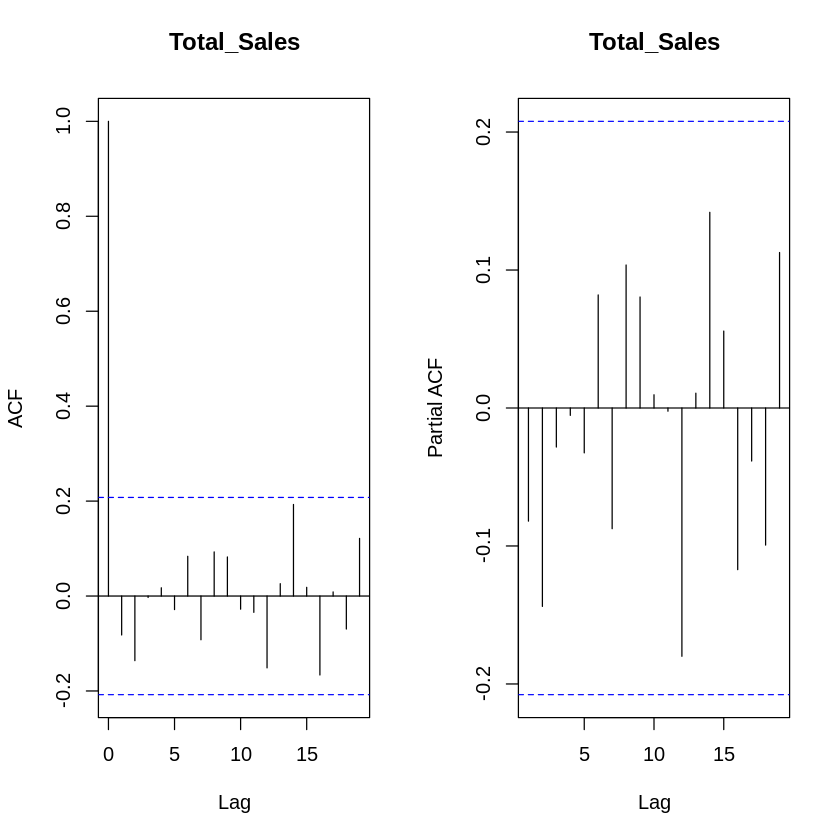

In [41]:
#check the ACF and PACF
par(mfrow=c(1,2))
acf(as.ts(data_sales_normal$Total_Sales), main="Total_Sales")
pacf(as.ts(data_sales_normal$Total_Sales), main="Total_Sales")